In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

## Tao Du Lieu

In [2]:
X = []
Y = []
for i in range(100):
    for j in range(100):
        new_data = np.array([i, j])
        X.append(new_data)
        new_label = np.array([i * j])
        Y.append(new_label)
X = np.array(X)
Y = np.array(Y)

In [3]:
print(X[1999])
print(Y[1999])

[19 99]
[1881]


In [4]:
np.random.seed(42)
indeces = np.random.permutation(X.shape[0])
X_train = X[indeces]/100.
Y_train = Y[indeces]/10000.

In [5]:
indeces_val = np.random.permutation(100)
X_val = X_train[indeces_val]
Y_val = Y_train[indeces_val]

In [6]:
print(X_train[199])
print(Y_train[199])

[0.39 0.12]
[0.0468]


## Xay dung mo hinh

In [7]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer="sgd", loss="mse", metrics=["mae"])

In [9]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.1461 - mae: 0.2310 - val_loss: 0.0784 - val_mae: 0.2387
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0214 - mae: 0.1082 - val_loss: 0.0490 - val_mae: 0.1980
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0147 - mae: 0.0906 - val_loss: 0.0305 - val_mae: 0.1352
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0111 - mae: 0.0793 - val_loss: 0.0231 - val_mae: 0.1070
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0096 - mae: 0.0734 - val_loss: 0.0088 - val_mae: 0.0699
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0090 - mae: 0.0708 - val_loss: 0.0043 - val_mae: 0.0500
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0665 - val_loss: 0.0078 - val_mae: 0.0625
Epoch 8/100
157/157 [==============================] - 0s 1ms/step - 

Epoch 62/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0413 - val_loss: 5.5809e-04 - val_mae: 0.0157
Epoch 63/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 6.8144e-04 - val_mae: 0.0161
Epoch 64/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 7.4886e-04 - val_mae: 0.0169
Epoch 65/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0027 - mae: 0.0403 - val_loss: 7.1348e-04 - val_mae: 0.0180
Epoch 66/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0413 - val_loss: 5.7651e-04 - val_mae: 0.0161
Epoch 67/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.0388 - val_loss: 7.1652e-04 - val_mae: 0.0177
Epoch 68/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0393 - val_loss: 5.5840e-04 - val_mae: 0.0167
Epoch 69/100
157/157 [============

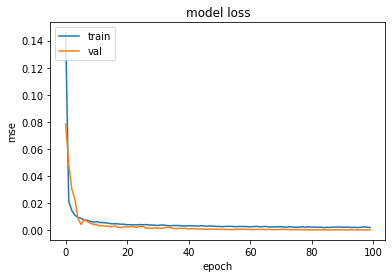

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

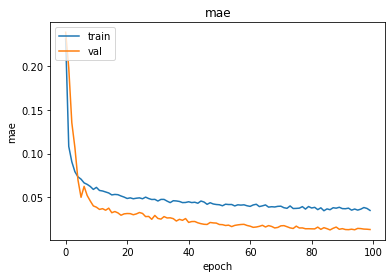

In [11]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Du doan

In [12]:
def predict(a, b):
    X_predict = np.array([[a, b]])/100.
    Y_predict = model.predict(X_predict)*10000.
    return Y_predict[0, 0]

In [13]:
predict(34, 87)

1/1 [==============================] - 0s 97ms/step


2730.3032